# Welcome to the Data Manipulation Lesson.
## Notebook 1

In this lesson, we will be using this workbook in tandum with the reading assignments.

The workbook has been broken up into three sections.  Each section has reading assignments and is followed by questions and prompts for you to work through.

In [your Canvas](https://launchcode.instructure.com/courses/14/quizzes/569), you will find the reading quiz.  

In [2]:
import pandas as pd
import numpy as np

data= pd.read_csv("titanic.csv")

## Before You Get Started

We are going to be using the Titanic Dataset. Make sure to run a head() before you start working with manipulation methods.

In [2]:
# Run the head of your data set here:
data.shape

data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
# check for duplicates
df=data.duplicated()
df.value_counts()

False    784
True     107
dtype: int64

In [10]:
# if there are, go ahead and drop them:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(784, 15)

### Cleaning Note:

While the columns are not the "prettiest", don't adjust any of them yet. We are going to update some values and add some values as we workthrough this notebook. Applologies for the extra visual "noise" on your screen. You will be given the option to tidy up the columns at the end of this notebook.

## Running Tables Note:  
If your tables don't appear to have accepted your changes, try the "Run All" option in the "Cell" section of the menu bar.  

<span style="background-color:dodgerblue; color:dodgerblue;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span> 

# A. Aggregation

1. Please read the following:
    - [Python | Pandas dataframe.aggregate()](https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/)
    - [Python | Pandas dataframe.groupby()](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/)
1. Answer the Check Your Understanding Questions in your Canvas account.
1. Work through the section Exercises.  
    - There are 4 sections in part A:
        - Groupby
        - Aggregation Methods
        - Groupby and Basic Math
        - Groupby and Multiple Aggregations


#### Creating Variables.

As we begin to manipulate our data, create new variables to store your work in.  This will keep your original data in tact.  Having the original dataset available will save you time with each manipulation.  You can also create variable names that inform you of the purpose of the manipulation.  

### 1: Groupby <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 

#### Groupby "embark_town"

1. Using the titanic data set, groupby "embark_town".
1. Create a variable that will represent the grouping of data. 
1. Intitalize it using the groupby() function and pass it the column.


In [19]:
# Code your groupby "embark_town" here:
gp=data.groupby("embark_town")

In [20]:
# To view the grouped data as a table, use the variable_name.first():
gp.first()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False
Queenstown,0,3,male,2.0,0,0,8.4583,Q,Third,man,True,C,no,True
Southampton,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,no,False


#### Groupby "survived"

Did you know that you can also chain on some of our exploratory methods to the groupby method?

1. Create & initalize a new variable to hold a table that will groupby "survived" 
1. Use method chaining to tack on the describe method

In [22]:
# Code your groupby "survived" table here:
gp1=data.groupby('survived')

# run your table below:
gp1.first()


,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,,,,,,,,,,,,,,
0,3,male,22.0,1,0,7.2500,S,Third,man,True,E,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [27]:
data['survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

In [23]:
# run your table with describe
gp1.describe()

pclass                                                 age  \
          count      mean       std  min  25%  50%  75%  max  count   
survived                                                              
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0  424.0   
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0  290.0   

                     ... parch        fare                             \
               mean  ...   75%  max  count       mean        std  min   
survived             ...                                                
0         30.626179  ...   0.0  6.0  549.0  22.117887  31.388207  0.0   
1         28.343690  ...   1.0  5.0  342.0  48.395408  66.596998  0.0   

                                         
              25%   50%   75%       max  
survived                                 
0          7.8542  10.5  26.0  263.0000  
1         12.4750  26.0  57.0  512.3292  

[2 rows x 40 columns]

In [59]:
# How is this table organized?  Why are there 40 columns now?



### 2. Aggregation Methods <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 

Note: **agg()** and **aggregate()** are identical [source](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html)

#### Method Chaining

1. Create a variable to method chain **head()** and **agg()** togehter.
1. Pass one of the following statistical values to **agg()**
   - "mean", "median", "mode", "min", "max", "std", "var", "first", "last", "sum"

In [34]:
# Code your method chain here:
ag=data.head().aggregate(['max','min'],axis=0)  

ag
    

C:\Users\tejas\AppData\Local\Temp\ipykernel_21952\2775970439.py:2: FutureWarning: ['deck'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ag=data.head().aggregate(['max','min'],axis=0)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
max,1,3,male,38.0,1,0,71.2833,S,Third,woman,True,Southampton,yes,True
min,0,1,female,22.0,0,0,7.2500,C,First,man,False,Cherbourg,no,False


In [30]:
# Create a variable to method chain head() with agg("sum")
ag1=data.head().agg(['sum'])
# run your table:
ag1

C:\Users\tejas\AppData\Local\Temp\ipykernel_21952\3232560443.py:2: FutureWarning: ['deck'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ag1=data.head().agg(['sum'])


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
sum,3,11,malefemalefemalefemalemale,156.0,3,0,147.6083,SCSSS,ThirdFirstThirdFirstThird,manwomanwomanwomanman,2,SouthamptonCherbourgSouthamptonSouthamptonSout...,noyesyesyesno,2


In [62]:
# Explain the sum table.  What is going on with the "sex", "class", and "alive" columns?
# Even the mentioned columns are aggregating

#### Using a Dictionary <span style="color:darkorange;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 
##### A dictionary is a Python collection type.  

Is a collection type that stores **key-value pairs**.  A key-value pair is an orgainzation system that is made up of a single *key* that has one or more *values* paired with it.  
Think of it like your contacts list.  The contacts list is the dictionary object.  
Each contact is organized by a key, usually name.  And attached to each name is contact information, or the values.
Some contacts might have email address, phone number, home or work address, etc. Other contacts may just be a name and phone number.  This is a very simple example, but understanding this orgainzational structure will be helpful as you learn to manipulate tables.  

*Here is a dictionary example with 3 keys:*
>**contacts_dictionary = {"name1": ["email", 555-5552, "work info"], 
      "name2": ["email", 555-5554],
      "name3": 555-5555}**
                     
*Here is a dictionary example with a single key-value pair*
**study_group_dictionary = {"name1": 555-5557}**   

It has a single key, and a list of values. The organization of this structure is called a "Key-Value Pair".
Using the contact list example, the key would be the name of the person and the values would be their contact information.  The key is a single item (the person's name) and the values can be a single item (an email address) or mulitple items (email, phone number, address, work info, etc).
Keys and values can be any data type, but must use correct data type syntax.  The keys do not have to be strings, but they do need to be a single value.  

For more information, you can read more on dictionary objects [here](https://www.w3schools.com/python/python_dictionaries.asp).


#### Aggregation across muliple columns using dictionary functionality

##### Syntax Example:

**age_dictionary={"age":["sum", "max"]}**

We are creating a new dictionary (**age_dictionary**).  The key is **age** and the values we want are **"sum""** and **"max"**.  This dictionary object has now become a tempate for the aggregations we want to preform.  However, on it's own, it does nothing.  Once passed to the **agg()** method, it will pick out the specific location of data we want to examine.  Making a subset table.  

The code is contained in the box below.  Run it and see what happens.


For syntax examples, review [this webpage](https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/).
#### <span style="color:coral;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span>

In [35]:
# Predict the table output before you uncomment the code below.

age_dictionary={"age":["sum", "max"]}
dictionary_agg=data.agg(age_dictionary)
dictionary_agg

,age
sum,21205.17
max,80.00


1. What if we want to look at more than one column at a time?  We pass more dictionaries to the agg function.
1. Create a variable to hold at least 3 columns.  Use the syntax from the "Syntax Example" as a guide.
    - Aggregate the following:  survived: "sum" & "count"; age: "std" & "min", and sibsp: "count" & "sum"

In [37]:
# Code your dictionary here:
gpag=data.agg({'survived':['sum','count'],
                'age':['std','min'],
                'sibsp':['count','sum']})

gpag

,survived,age,sibsp
sum,342.0,NaN,466.0
count,891.0,NaN,891.0
std,NaN,14.526497,NaN
min,NaN,0.420000,NaN


### 3. Groupby and Basic Math <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 

1. Groupby "pclass".  Make sure you use a variable to hold your grouped data.

In [38]:
# Code your groupby here:

gb=data.groupby('pclass')

# Run your table using first() here instead of head():
gb.first()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
pclass,,,,,,,,,,,,,,
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,female,14.0,1,0,30.0708,C,Second,child,False,D,Cherbourg,yes,False
3,0,male,22.0,1,0,7.2500,S,Third,man,True,G,Southampton,no,False


### 4. Groupby and Multiple Aggregations <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 

#### Group with a List<span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span>

1. We want to do muliple aggregation functions to our newly grouped data set.  We created a variable to hold a list of functions we want to perform.  These functions are part of the agg method.  When we pass our list to the method, the method will iterate through each item and perform that function for the entire table.

In [39]:
# our list of functions
agg_func_list = ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'first', 'last', 'count']


#Apply the agg method to our passenger_class variable (made in the Groupby Basic Math section).  
# Pass our list to the function and run your table.
gb.agg(agg_func_list)

  

C:\Users\tejas\AppData\Local\Temp\ipykernel_21952\319394135.py:7: FutureWarning: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  gb.agg(agg_func_list)


survived                                                                \
            sum      mean median min max       std       var first last count   
pclass                                                                          
1           136  0.629630    1.0   0   1  0.484026  0.234281     1    1   216   
2            87  0.472826    0.0   0   1  0.500623  0.250624     1    0   184   
3           119  0.242363    0.0   0   1  0.428949  0.183998     0    0   491   

        ... alone                                                           \
        ...   sum      mean median    min   max       std       var  first   
pclass  ...                                                                  
1       ...   109  0.504630    1.0  False  True  0.501140  0.251141  False   
2       ...   104  0.565217    1.0  False  True  0.497081  0.247090  False   
3       ...   324  0.659878    1.0  False  True  0.474233  0.224897  False   

                    
        last count  
pclass              
1       True   216  
2       True   184  
3       True   491  

[3 rows x 70 columns]

#### Group with a Dictionary<span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span>

Using only a list provides us with the entire table.  What if we only want to look at age vs pclass?  

we can create a dictionary to hold the age column for us.  The *key* would be the name of our column, and the values our list of functions to preform on that column.  The code would look like this:

In [42]:
agg_func_dict = {
    'age':
    ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'first', 'last', 'count']
}
# We would run our table like this:
gb.agg(agg_func_dict)  

age                                                             \
            sum       mean median   min   max        std         var first   
pclass                                                                       
1       7111.42  38.233441   37.0  0.92  80.0  14.802856  219.124543  38.0   
2       5168.83  29.877630   29.0  0.67  70.0  14.001077  196.030152  14.0   
3       8924.92  25.140620   24.0  0.42  74.0  12.495398  156.134976  22.0   

                    
        last count  
pclass              
1       26.0   186  
2       27.0   173  
3       32.0   355

Looking at the *age_func_dict* syntax, create a dictionary variable for the "survived" column and pass it to **passenger_class.agg()** in the box below.

In [43]:
# Code it here:
agg_func_dict = {
    'age':
    ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'first', 'last', 'count'],
    'survived':['count','first','last']
}

gb.agg(agg_func_dict) 

age                                                             \
            sum       mean median   min   max        std         var first   
pclass                                                                       
1       7111.42  38.233441   37.0  0.92  80.0  14.802856  219.124543  38.0   
2       5168.83  29.877630   29.0  0.67  70.0  14.001077  196.030152  14.0   
3       8924.92  25.140620   24.0  0.42  74.0  12.495398  156.134976  22.0   

                   survived             
        last count    count first last  
pclass                                  
1       26.0   186      216     1    1  
2       27.0   173      184     1    0  
3       32.0   355      491     0    0

<span style="background-color:dodgerblue; color:dodgerblue;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span> 

# B. Recoding and Creating New Values and Variables 

1. Please read the following:
    1. [How to create new columns derived from existing columns?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html)
    1.[Recode Data](https://pythonfordatascienceorg.wordpress.com/recode-data/)
1. Answer the Check Your Understanding questions in your Canvas Account.
1. Work through the Part B, there are 2 sections

Suggested Reading:
- [How to manipulate textual data?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html)

### Create a New Column <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 
As questions arrise during your data exploring and cleaning, you might want to test them out.  In this instance, we want to make sure the values we want to manipulate remain untouched. One thing we can do is to add a new column that will contain our manipulations.

In the box below:
1. Create a new column by manipulating the values of different column.  Specifically, create a new column, "fare_2021" that allows us to compare the cost of fare in pounds back in 1912 to 2021.  [This website](https://www.in2013dollars.com/uk/inflation/1912) can help you find the 2021 fare amount. 

In [7]:
# Code your new "fare_2021" column here:
data['fare_2021']=data['fare']*146.14

# Run the head of your table to see your new column:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_2021
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1059.515000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,10417.341462
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1158.159500
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,7760.034000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1176.427000
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,1236.095962
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,7579.185750
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,3079.900500
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,1627.020462
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,4394.546712


### Replacing Values <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 
 
Replace the values in the "alive" coloum from string "yes" or "no" to bools, where "yes" becomes True and "no" becomes False.

In [12]:
# Code your updated values here:
data['alive']=data['alive'].str.replace('yes','True')

data['alive'].head()

0      no
1    True
2    True
3    True
4      no
Name: alive, dtype: object

We can also use functions to update values.

1. Create a function that will set the alive values as bools. Apply it to your table and run your table here:

In [13]:
# Code your function here:
def setbools(series):
    if series == 'no':
      return False
    else:
        return series
    
data['alive']= data['alive'].apply(setbools)
data['alive'].value_counts()

False    549
True     342
Name: alive, dtype: int64

### Using a function to create a new column <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 

Sometimes you might want to create a new column based on combining multiple columns together.

1. create an "age_group" column that breaks years up as 0-19, 20-29, 30-39, etc until all given ages are covered.  Make sure you check to see where you can stop counting by 10s.

In [15]:
# Write your max age check here:
agg_func={'age':['max','min']}

data.agg(agg_func)


,age
max,80.00
min,0.42


In [18]:
# Code the new "age_group" column function here:
def age_grp(series):
    if series < 20:
        return '0-19 years'
    elif 20 <= series <= 29:
        return '20-29 years'
    elif 30<= series<= 39:
        return '30-39 years'
    elif 40<= series<= 49:
        return '40-49 years'
    elif 50<= series<= 59:
        return '50-59 years'
    elif 60<= series<= 69:
        return '60-69 years'
    elif 70<= series<= 80:
        return '70-80 years'
data['Age_grp']=data['age'].apply(age_grp)

data['Age_grp'].value_counts()

data.head()   

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_2021,Age_grp
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,False,1059.515000,20-29 years
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,True,False,10417.341462,30-39 years
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,True,1158.159500,20-29 years
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,True,False,7760.034000,30-39 years
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,False,True,1176.427000,30-39 years


<span style="background-color:dodgerblue; color:dodgerblue;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span> 

# C. Reshaping Tables

1. Please read the following:
    1. [How to reshape the layout of tables?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/07_reshape_table_layout.html)
1. Answer the Check Your Understanding in your Canvas account
1. Work through Part C, there are 4 sections


Suggested Reading:
1. [pandas.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
1. [pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)
1. [pandas.pivot](https://pandas.pydata.org/docs/reference/api/pandas.pivot.html)

### Sort_values <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 

Use **sort_values()** to answer the following question:
> What is the age of the person who paid the highest fare?

Hint: We want to see the highest fare value first. What order would we want? ascending or descending?  Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values) for the syntax.

In [22]:
# Code your sort_values here:
data.sort_values(by='fare',ascending=False).head()

# Run your table here:

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_2021,Age_grp
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,True,True,74871.789288,30-39 years
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,True,True,74871.789288,30-39 years
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,True,False,74871.789288,30-39 years
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,True,False,38434.820000,20-29 years
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,False,False,38434.820000,0-19 years


In [27]:
First = data[data['class']== 'First']

First

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_2021,Age_grp
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,True,False,10417.341462,30-39 years
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,True,False,7760.034000,30-39 years
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,False,True,7579.185750,50-59 years
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,True,True,3880.017000,50-59 years
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,True,True,5187.970000,20-29 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,True,False,7680.270788,40-49 years
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,False,True,730.700000,30-39 years
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,True,False,12152.753962,50-59 years
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True,True,4384.200000,0-19 years


In [34]:
First_subset=First.sort_index().groupby(['who']).head(2)

First_subset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_2021,Age_grp
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,True,False,10417.341462,30-39 years
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,True,False,7760.034000,30-39 years
6,0,1,male,54.00,0,0,51.8625,S,First,man,True,E,Southampton,False,True,7579.185750,50-59 years
23,1,1,male,28.00,0,0,35.5000,S,First,man,True,A,Southampton,True,True,5187.970000,20-29 years
297,0,1,female,2.00,1,2,151.5500,S,First,child,False,C,Southampton,False,False,22147.517000,0-19 years
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,True,False,22147.517000,0-19 years


In [45]:
First.pivot(columns='embark_town',values='fare')

embark_town,NaN,Cherbourg,Queenstown,Southampton
1,NaN,71.2833,NaN,NaN
3,NaN,NaN,NaN,53.1000
6,NaN,NaN,NaN,51.8625
11,NaN,NaN,NaN,26.5500
23,NaN,NaN,NaN,35.5000
...,...,...,...,...
871,NaN,NaN,NaN,52.5542
872,NaN,NaN,NaN,5.0000
879,NaN,83.1583,NaN,NaN
887,NaN,NaN,NaN,30.0000


In [90]:
First.head()
First['embarked'].value_counts()

S    127
C     85
Q      2
Name: embarked, dtype: int64

<Axes: >

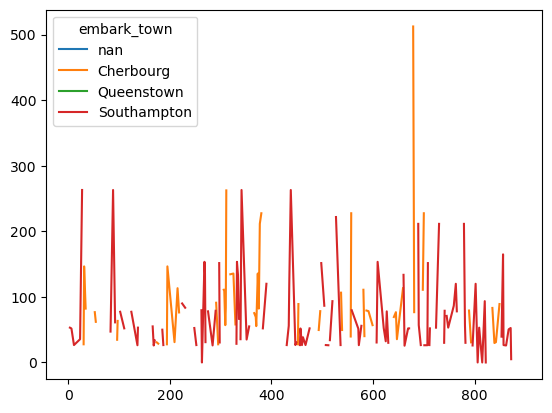

In [43]:
First.pivot(columns='embark_town',values='fare').plot()

### pivot_table <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 
1. pivot the table of the summed data where the values are "fare", index is "who" and "age_group", and the columns are "survived"

Hint: set the aggfunc parameter to np.sum




In [50]:
# Code your pivot_table here:



# Run your table here:

data.groupby(['survived','Age_grp','who']).sum()

C:\Users\tejas\AppData\Local\Temp\ipykernel_46324\1033628268.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['survived','Age_grp','who']).sum()


pclass      age  sibsp  parch       fare  \
survived Age_grp     who                                               
0        0-19 years  child     100   245.50    103     48  1109.5459   
                     man       117   782.00     19     11   978.4249   
                     woman      21   123.00      8      3   126.1375   
         20-29 years man       323  2998.50     29     10  2435.2329   
                     woman      55   486.00     11     11   404.7500   
         30-39 years man       202  2852.00     23     16  1506.2789   
                     woman      29   337.50      4     12   164.9042   
         40-49 years man        98  1978.00     13     11  1110.6374   
                     woman      29   439.00      6     21   241.2542   
         50-59 years man        47  1394.50      4      5   853.3042   
                     woman       3   107.00      0      0    39.2125   
         60-69 years man        19   816.00      2      6   586.4875   
         70-80 years man        11   426.50      1      1   181.1834   
1        0-19 years  child     118   283.17     41     57  1611.6751   
                     man        12    89.00      0      2   145.5333   
                     woman      47   442.00     12     14  1243.0209   
         20-29 years man        57   633.00      6      2   646.9542   
                     woman     104  1280.00     25     32  2514.4291   
         30-39 years man        42   778.00      5      4  1720.9459   
                     woman      80  1695.50     27     23  3350.8791   
         40-49 years man        17   542.00      5      0   466.6793   
                     woman      31   963.00      9     10  1563.6335   
         50-59 years man         4   209.00      2      0   226.2000   
                     woman      21   855.00      8      8  1182.0833   
         60-69 years man         3   122.00      1      1    89.7000   
                     woman       6   248.00      2      0   242.7958   
         70-80 years man         1    80.00      0      0    30.0000   

                            adult_male  alone      fare_2021  
survived Age_grp     who                                      
0        0-19 years  child           0      2  162149.037826  
                     man            44     31  142987.014886  
                     woman           0      3   18433.734250  
         20-29 years man           123     96  355884.936006  
                     woman           0      9   59150.165000  
         30-39 years man            84     60  220127.598446  
                     woman           0      5   24099.099788  
         40-49 years man            45     31  162308.549636  
                     woman           0      1   35256.888788  
         50-59 years man            26     19  124701.875788  
                     woman           0      2    5730.514750  
         60-69 years man            13     10   85709.283250  
         70-80 years man             6      5   26478.142076  
1        0-19 years  child           0      4  235530.199114  
                     man             5      4   21268.236462  
                     woman           0     10  181655.074326  
         20-29 years man            25     18   94545.886788  
                     woman           0     25  367458.668674  
         30-39 years man            23     17  251499.033826  
                     woman           0     23  489697.471674  
         40-49 years man            12      7   68200.512902  
                     woman           0     10  228509.399690  
         50-59 years man             4      3   33056.868000  
                     woman           0      5  172749.653462  
         60-69 years man             2      1   13108.758000  
                     woman           0      2   35482.178212  
         70-80 years man             1      1    4384.200000

In [62]:

data_pivot=data.pivot_table(columns='survived',values='fare',index=['Age_grp','who'],aggfunc='sum')

data_pivot

survived                   0          1
Age_grp     who                        
0-19 years  child  1109.5459  1611.6751
            man     978.4249   145.5333
            woman   126.1375  1243.0209
20-29 years man    2435.2329   646.9542
            woman   404.7500  2514.4291
30-39 years man    1506.2789  1720.9459
            woman   164.9042  3350.8791
40-49 years man    1110.6374   466.6793
            woman   241.2542  1563.6335
50-59 years man     853.3042   226.2000
            woman    39.2125  1182.0833
60-69 years man     586.4875    89.7000
            woman        NaN   242.7958
70-80 years man     181.1834    30.0000

In [87]:
data_pivoted = data_pivot.pivot(columns="survived", values="fare").reset_index()

KeyError: 'survived'

### Wide to Long <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 

1. Create a table where the columns are "who" and the values are "pclass"
1. Answer the question:  How does this table differ from the pivot_table above?  Specifically, how is "who" different?

In [64]:
# Code your table here:

data2_pivoted=data.pivot(columns='who',values='pclass')

# data['who'].value_counts()
# Run your table here:
data2_pivoted

# Answer the question here:

# who acts as index in the above table.Here it is columns

who,child,man,woman
0,NaN,3.0,NaN
1,NaN,NaN,1.0
2,NaN,NaN,3.0
3,NaN,NaN,1.0
4,NaN,3.0,NaN
...,...,...,...
886,NaN,2.0,NaN
887,NaN,NaN,1.0
888,NaN,NaN,3.0
889,NaN,1.0,NaN


### Melt <span style="color:dodgerblue;"> - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - </span> 

1.  What does **melt** to the data? 

In [77]:
# What does melt do?

data2=data.melt(id_vars='fare')

data2.shape

data2.head(10)

,fare,variable,value
0,7.2500,survived,0
1,71.2833,survived,1
2,7.9250,survived,1
3,53.1000,survived,1
4,8.0500,survived,0
5,8.4583,survived,0
6,51.8625,survived,0
7,21.0750,survived,0
8,11.1333,survived,1
9,30.0708,survived,1


2. Melt to your data.  Be sure to store the output in a new variable.  What is the new shape of your table?

In [76]:
# Create your default melt table here with the following syntax:  new_name = pd.melt(data_set)
data_melt=pd.melt(data)
# Run your table here:
data_melt
# Check the shape of your new table.
data_melt.shape

(15147, 2)

3. Create a melt table where the index variables are "embarked", and the values are "fare" and "deck"

In [91]:
# Create your melt table here:
data_melt1=data.melt(id_vars='embarked',value_vars=['fare','deck'],var_name='entry')

# Run your table here:
data_melt1
# Check the shape
# data_melt1.head(20)

,embarked,entry,value
0,S,fare,7.25
1,C,fare,71.2833
2,S,fare,7.925
3,S,fare,53.1
4,S,fare,8.05
...,...,...,...
1777,S,deck,NaN
1778,S,deck,B
1779,S,deck,NaN
1780,C,deck,C


# Optonal Challenges:

1. Clean and Explore the table.  
    1. How would you handle any missing data?
    1. Would you keep all of the columns?
    1. Would you want to manipulate any data?